<a href="https://colab.research.google.com/github/varmagsr/Tensorflow/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
if not tf.__version__ == '2.8.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.8.0, or restart your Kernel (Kernel->Restart & Clear Output)')

2.8.2


ValueError: ignored

In [8]:
a = tf.constant([2], name = 'constant_a')
b = tf.constant([4], name = 'constant_b')

In [9]:
a

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>

In [10]:
tf.print(a.numpy()[0])

2


In [11]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c

In [12]:
result = add(a,b)
tf.print(result[0])

Tensor("Add:0", shape=(1,), dtype=int32)
6


<h2>Defining multidimensional arrays using TensorFlow</h2>
Now we will try to define such arrays using TensorFlow:

In [13]:

Scalar = tf.constant(2)
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant( [ [[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]] ] )

print ("Scalar (1 entry):\n %s \n" % Scalar)

print ("Vector (3 entries) :\n %s \n" % Vector)

print ("Matrix (3x3 entries):\n %s \n" % Matrix)

print ("Tensor (3x3x3 entries) :\n %s \n" % Tensor)

Scalar (1 entry):
 tf.Tensor(2, shape=(), dtype=int32) 

Vector (3 entries) :
 tf.Tensor([5 6 2], shape=(3,), dtype=int32) 

Matrix (3x3 entries):
 tf.Tensor(
[[1 2 3]
 [2 3 4]
 [3 4 5]], shape=(3, 3), dtype=int32) 

Tensor (3x3x3 entries) :
 tf.Tensor(
[[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]], shape=(3, 3, 3), dtype=int32) 



In [15]:
Scalar.shape

TensorShape([])

In [16]:
Vector.shape

TensorShape([3])

In [17]:
Matrix.shape

TensorShape([3, 3])

In [19]:


Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

@tf.function
def add():
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    return add_1_operation



print ("Defined using tensorflow function :")
add_1_operation = add()
print(add_1_operation)
print ("Defined using normal expressions :")
add_2_operation = Matrix_one + Matrix_two
print(add_2_operation)

Defined using tensorflow function :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)
Defined using normal expressions :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)


In [20]:

Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

@tf.function
def mathmul():
  return tf.matmul(Matrix_one, Matrix_two)


mul_operation = mathmul()

print ("Defined using tensorflow function :")
print(mul_operation)



Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


Variables:-

In [21]:
v = tf.Variable(0)

In [22]:
@tf.function
def increment_by_one(v):
        v = tf.add(v,1)
        return v

for i in range(3):
    v = increment_by_one(v)
    print(v)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


Operations:-

In [24]:
a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)


print ('c =: %s' % c)
    
print ('d =: %s' % d)

c =: tf.Tensor([7], shape=(1,), dtype=int32)
d =: tf.Tensor([3], shape=(1,), dtype=int32)


# LINEAR REGRESSION WITH ***TENSORFLOW***

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [27]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

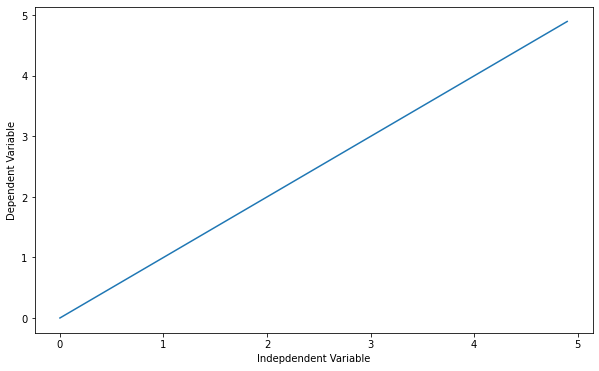

In [28]:
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# *Linear Regression with TensorFlow*

In [29]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-09-12 17:43:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2022-09-12 17:43:45 (2.14 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [30]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [38]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables a and b, with any random guess, and then we define the linear function:

In [39]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [40]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [41]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

Lets plot the loss values to see how it has changed during the training:

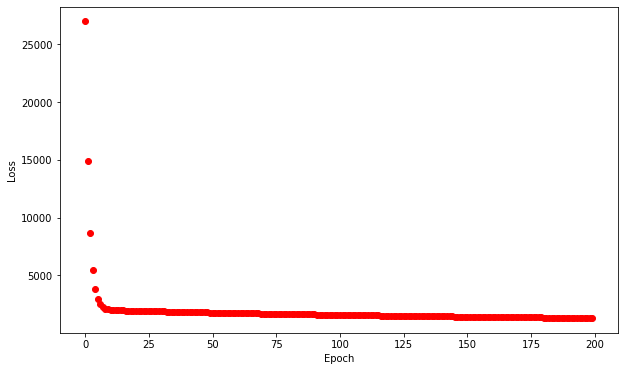

In [42]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

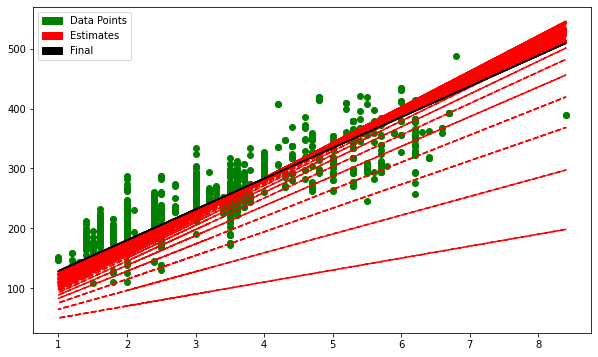

In [43]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

Lets visualize how the coefficient and intercept of line has changed to fit the data:

The green dots are the data points, the red lines are created using the a and b coefficients during training, and the black line is the line we use to model the relationship with the final/last coefficients.
